<a href="https://colab.research.google.com/github/rugvedbairagi26/car-price-prediction-ann/blob/main/Car_Price_Prediction_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Normalization


In [2]:
import kagglehub


path = kagglehub.dataset_download("yashpaloswal/ann-car-sales-price-prediction")

print("Path to dataset files:", path)

100%|██████████| 29.0k/29.0k [00:00<00:00, 25.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yashpaloswal/ann-car-sales-price-prediction/versions/1


In [8]:
import os

# List files in the downloaded directory
downloaded_files = os.listdir(path)
print(downloaded_files)

['car_purchasing.csv']


In [15]:
print(os.listdir(path))


['car_purchasing.csv']


In [21]:
file_name = "car_purchasing.csv"
csv_path = os.path.join(path, file_name)
df = pd.read_csv(csv_path, encoding='latin-1')
display(df.head())



,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [20]:
print(df.isnull().sum())

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64


In [22]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [24]:
X = df.drop(['customer name', 'customer e-mail', 'country', 'car purchase amount'], axis=1)
y = df['car purchase amount']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
numerical_features = ['age', 'annual Salary', 'credit card debt', 'net worth']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features)])

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [35]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_transformed.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])


model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train the model

In [36]:
history = model.fit(
    X_train_transformed, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)]
)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2240265472.0000 - mae: 45859.1172 - val_loss: 1938706432.0000 - val_mae: 42925.7344
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2046769536.0000 - mae: 43986.0938 - val_loss: 1938664832.0000 - val_mae: 42925.2578
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2101245312.0000 - mae: 44558.5352 - val_loss: 1938575360.0000 - val_mae: 42924.2344
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2024165632.0000 - mae: 43619.9922 - val_loss: 1938385664.0000 - val_mae: 42922.0742
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2119398656.0000 - mae: 44753.8555 - val_loss: 1937999104.0000 - val_mae: 42917.6641
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2066421376.0000 - mae: 44102.6992 - val_loss: 1937268992.0000 - val_mae: 42909.3203
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2091698688.0000 - mae: 44334.5938 - val_loss: 1935978880.0000 - val_mae: 428

In [37]:
loss, mae = model.evaluate(X_test_transformed, y_test)
print(f"Test MAE: {mae:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 46545912.0000 - mae: 5689.3335
Test MAE: 5650.51


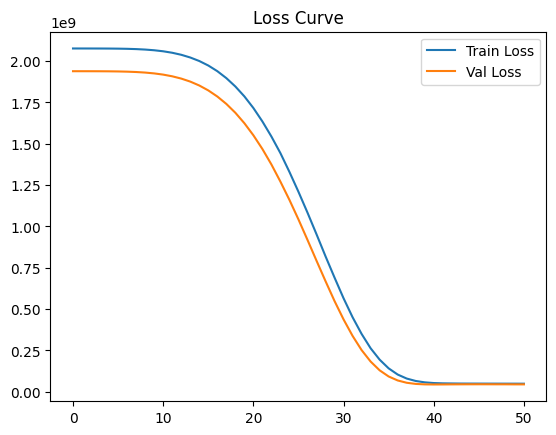

In [38]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Loss Curve')
plt.show()
